# IRIS FLOWER CLASSIFICATION
Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix


#### Upload Dataset

In [3]:
df=pd.read_csv(r"C:\Users\Admin\Downloads\iris.csv")

#### Top 5 rows of dataset

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
118,119,7.7,2.6,6.9,2.3,Iris-virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa
105,106,7.6,3.0,6.6,2.1,Iris-virginica
62,63,6.0,2.2,4.0,1.0,Iris-versicolor
88,89,5.6,3.0,4.1,1.3,Iris-versicolor
4,5,5.0,3.6,1.4,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
58,59,6.6,2.9,4.6,1.3,Iris-versicolor
1,2,4.9,3.0,1.4,0.2,Iris-setosa
89,90,5.5,2.5,4.0,1.3,Iris-versicolor


In [6]:
df.shape

(150, 6)

### DATA PROCESSING

In [7]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

#### Summary

In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### Check NULL values in dataset

In [10]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
df.count()

Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

## DATA CLEANING
#### Dropping extra cols

In [12]:
df=df.drop('Id',axis=1)
df.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
105,7.6,3.0,6.6,2.1,Iris-virginica
73,6.1,2.8,4.7,1.2,Iris-versicolor
119,6.0,2.2,5.0,1.5,Iris-virginica
51,6.4,3.2,4.5,1.5,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor
77,6.7,3.0,5.0,1.7,Iris-versicolor
66,5.6,3.0,4.5,1.5,Iris-versicolor
121,5.6,2.8,4.9,2.0,Iris-virginica
120,6.9,3.2,5.7,2.3,Iris-virginica
132,6.4,2.8,5.6,2.2,Iris-virginica


## DATA VISUALIZATION
#### HEAT PLOT

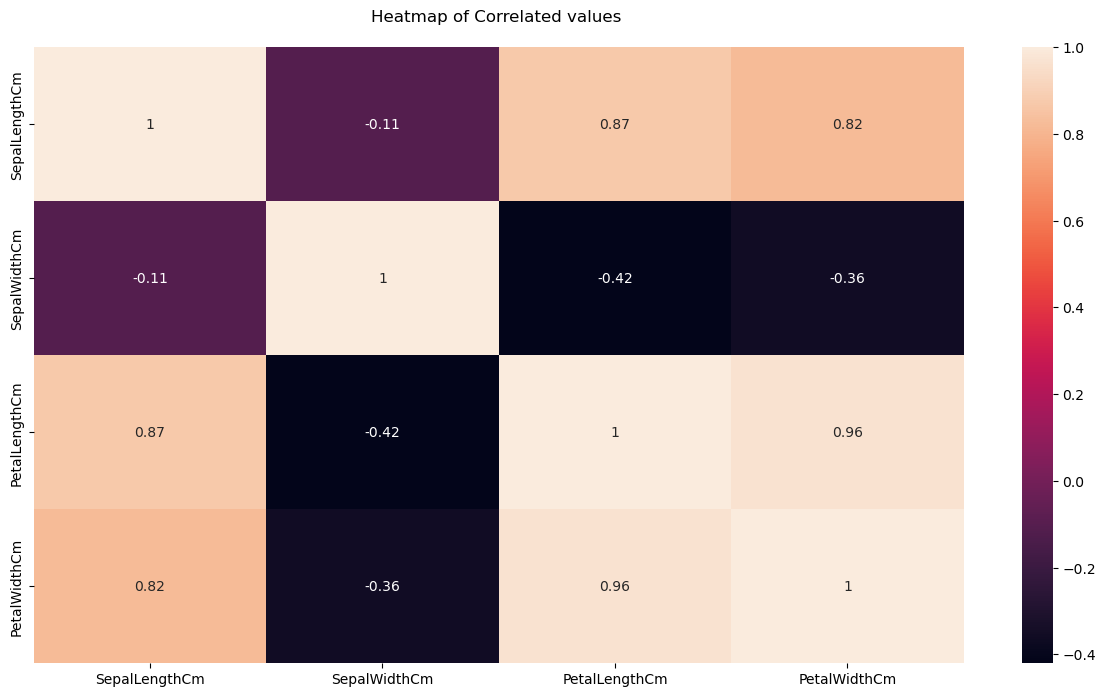

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True).set(title='Heatmap of Correlated values \n')
sns.diverging_palette(200,30,l=50,as_cmap=True)
plt.show()

#### HISTOGRAMS

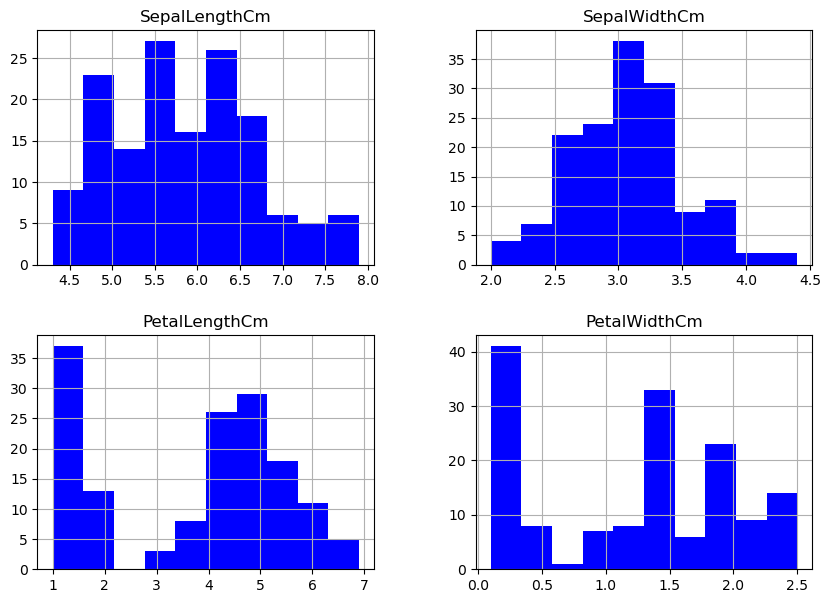

In [14]:
df.hist(color="blue",figsize=(10,7))
plt.show()

#### PAIR PLOT

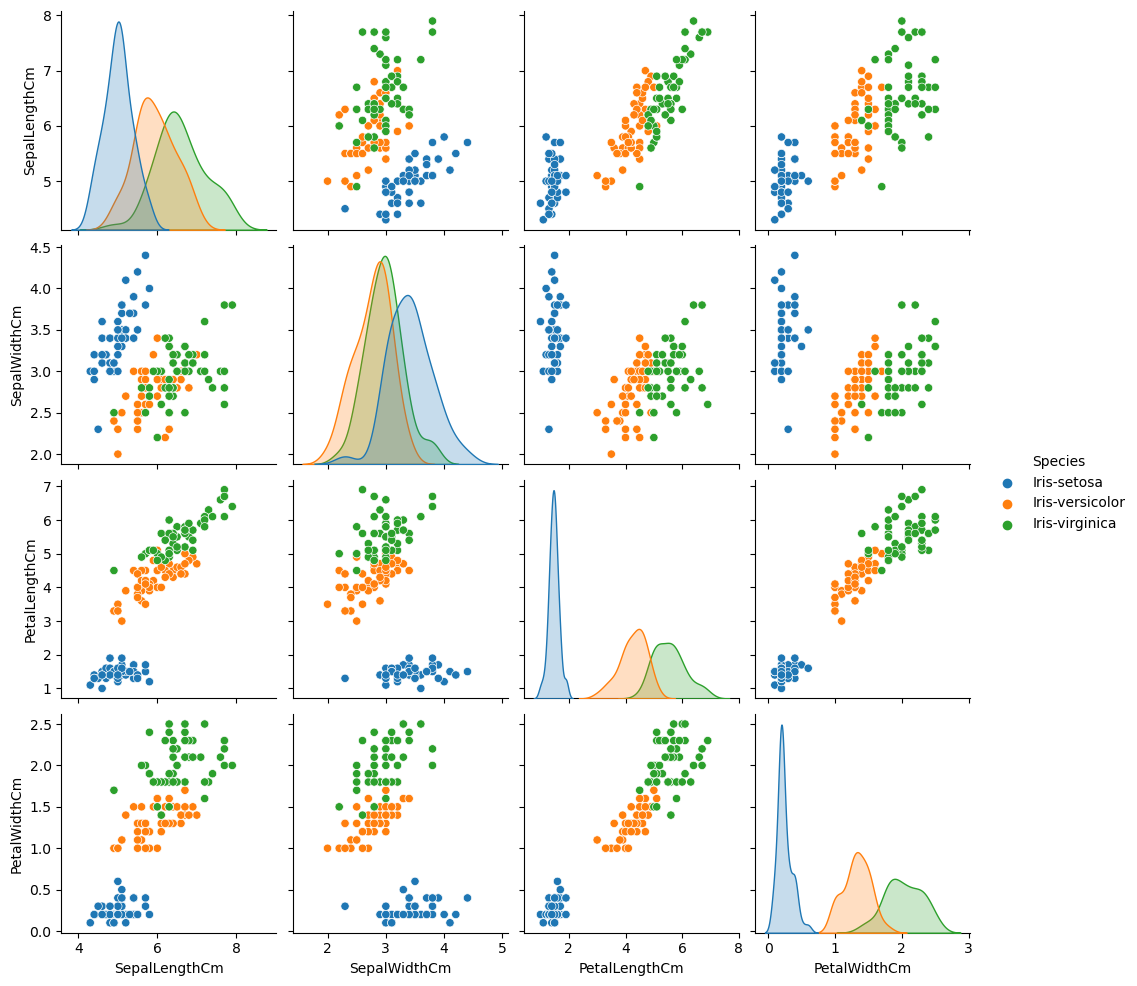

In [15]:
sns.pairplot(df,hue='Species')
plt.show()

#### BAR PLOTS

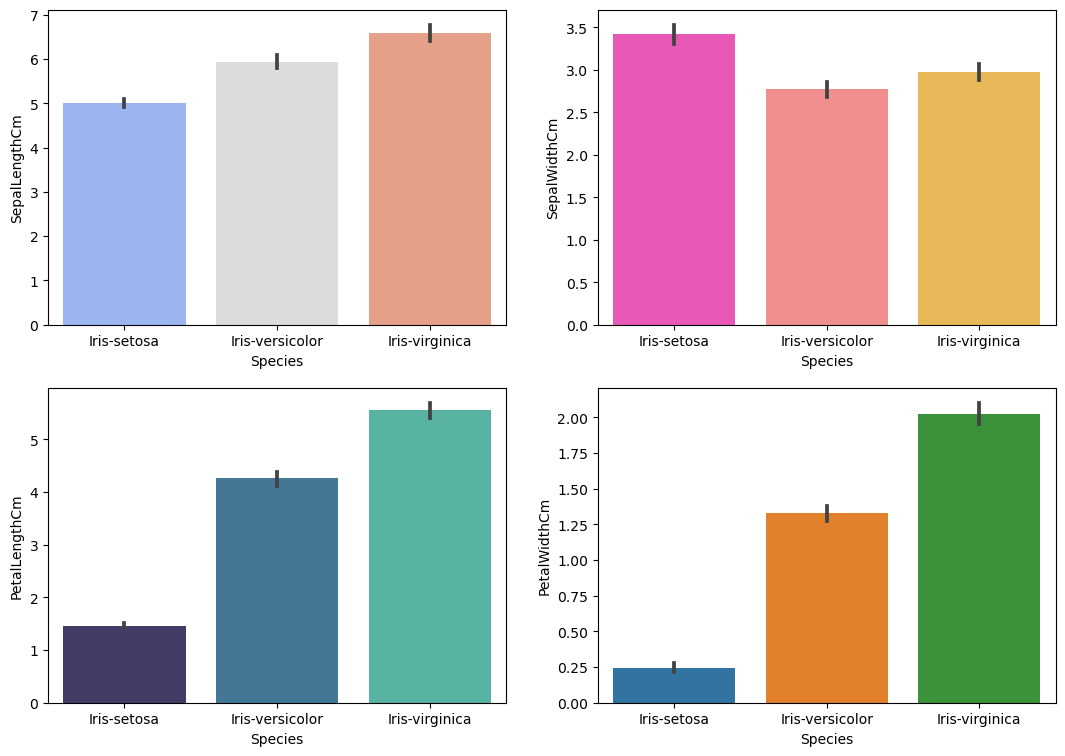

In [16]:
plt.figure(figsize=(13,9))
plt.subplot(2,2,1)
sns.barplot(x='Species',y='SepalLengthCm',data=df,palette='coolwarm')
plt.subplot(2,2,2)
sns.barplot(x='Species',y='SepalWidthCm',data=df,palette='spring')
plt.subplot(2,2,3)
sns.barplot(x='Species',y='PetalLengthCm',data=df,palette='mako')
plt.subplot(2,2,4)
sns.barplot(x='Species',y='PetalWidthCm',data=df)

plt.show()

#### PIE PLOT

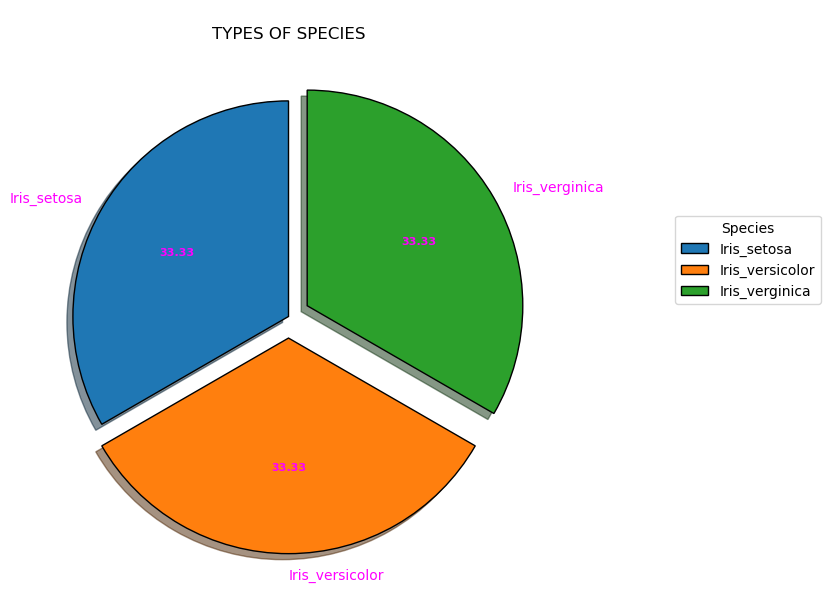

In [17]:
fig,ax=plt.subplots(figsize=(10,7))
m=['Iris_setosa','Iris_versicolor','Iris_verginica']
ax.set_title("\nTYPES OF SPECIES",color="black")
explode=(0.0,0.1,0.1)
wp={'linewidth':1,'edgecolor':'black'}
wedges,texts,autotexts=ax.pie(df['Species'].value_counts(),autopct="%0.2f",explode=explode,labels=m,shadow=True,
                              startangle=90,wedgeprops=wp,textprops=dict(color='magenta'))
ax.legend(wedges,m,title='Species',bbox_to_anchor=(1,0,0.5,0.7))
plt.setp(autotexts,size=8,weight='bold')
plt.show()

## MODEL BUILDING
#### Before labelling

In [18]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### LABEL ENCODING DONE ON 'SPECIES' COLUMN

* 0 = setosa
* 1 = Versicolor
* 2 = Virginica

In [19]:
l=LabelEncoder()

In [20]:
df['Species']=l.fit_transform(df['Species'])

#### After labelling

In [21]:
df['Species'].unique()

array([0, 1, 2])

### SPLITTING THE DATA



In [22]:
x=df.drop(columns=['Species'])
y=df['Species']

In [23]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

#### Train and Test data

* Training data : 80%
* Testing data : 20%

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [26]:
x_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
90,5.5,2.6,4.4,1.2
146,6.3,2.5,5.0,1.9
45,4.8,3.0,1.4,0.3
130,7.4,2.8,6.1,1.9
27,5.2,3.5,1.5,0.2


In [27]:
x_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
38,4.4,3.0,1.3,0.2
2,4.7,3.2,1.3,0.2
43,5.0,3.5,1.6,0.6
11,4.8,3.4,1.6,0.2
36,5.5,3.5,1.3,0.2


In [28]:
y_train.head()

90     1
146    2
45     0
130    2
27     0
Name: Species, dtype: int32

In [29]:
y_test.head()

38    0
2     0
43    0
11    0
36    0
Name: Species, dtype: int32

In [30]:
x_train.shape

(120, 4)

In [31]:
x_test.shape

(30, 4)

In [32]:
y_train.shape

(120,)

In [33]:
y_test.shape

(30,)

## LOGISTIC REGRESSION

In [34]:
model=LogisticRegression()

In [35]:
model.fit(x_train,y_train)

LogisticRegression()

In [36]:
y_pred=model.predict(x_test)
print(y_pred)

[0 0 0 0 0 2 0 2 0 2 2 2 0 2 1 2 2 1 2 0 1 0 1 1 2 1 1 2 2 1]


In [37]:
y_test.head(10)

38     0
2      0
43     0
11     0
36     0
109    2
10     0
141    2
48     0
70     1
Name: Species, dtype: int32

As we can see that y_pred value returned after running over x_test results the same as y_test values

Hence , model trained and predicted successfully !!

#### confusion_matrix

In [38]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

#### Accuracy

In [39]:
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of Logistic Regression Model is",accuracy)

Accuracy of Logistic Regression Model is 96.66666666666667


## KNN ALGORITHM

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
std_scalar=StandardScaler().fit(x_train)
x_trainstd=std_scalar.transform(x_train)
x_teststd=std_scalar.transform(x_test)

In [41]:
KNN=KNeighborsClassifier(n_neighbors=5)

In [42]:
KNN.fit(x_trainstd,y_train)

KNeighborsClassifier()

In [43]:
KNN_pred=KNN.predict(x_teststd)
print(KNN_pred)

[0 0 0 0 0 2 0 2 0 1 2 2 0 2 1 2 2 1 2 0 1 0 1 1 2 2 1 2 2 1]


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [44]:
y_test.head(10)

38     0
2      0
43     0
11     0
36     0
109    2
10     0
141    2
48     0
70     1
Name: Species, dtype: int32

As we can see that "predict_knn" value returned after running over x_test results the same as y_test values

Hence , model trained and predicted successfully !!

#### Accuracy

In [45]:
accuracy=accuracy_score(y_test,KNN_pred)*100
print("Accuracy of KNN model is",accuracy)

Accuracy of KNN model is 96.66666666666667
